<a href="https://colab.research.google.com/github/Alessandro-2003/DNA/blob/main/DNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Per generare le sequenze di DNA utilizzare 'http://www.faculty.ucr.edu/~mmaduro/random.htm'
Inserisci la sequenza DNA di riferimento di lunghezza 200 

Inserisci la prima sequenza DNA di lunghezza 4 

Inserisci la seconda sequenza DNA di lunghezza 4 

Inserisci la terza sequenza DNA di lunghezza 4 

Inserisci delle sequenze valide: 
seq1() 
seq2() 
seq3() 

Inserisci una ulteriore sequenza DNA di lunghezza 200 

Le due sequenze non hanno nessuna sotto-sequenza in comune 

Sequenza di 200 nucleotidi composta solo dai 0 simboli che appaiono nella stessa posizione sia nella sequenza di riferimento che in quella secondaria: 
 

Frequenza nucleotidi: 
['A', 'G', 'C', 'T', 'Y', 'R', 'W', 'S', 'K', 'M', 'D', 'V', 'H', 'B']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


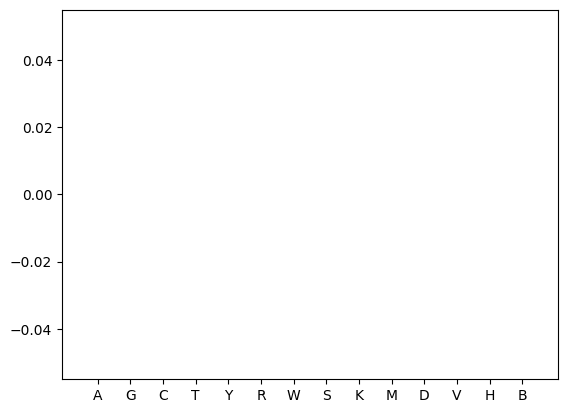

Consensus Sequence del Transcription Factor IKZF1 (BHTGTGGTYW): None


In [1]:
def occorrenze_posizione(sequenza_di_riferimento, sequenza_di_controllo1, sequenza_di_controllo2, sequenza_di_controllo3):
  variabili = [sequenza_di_controllo1, sequenza_di_controllo2, sequenza_di_controllo3]
  if (not sequenza_di_controllo1 or not sequenza_di_controllo2 or not sequenza_di_controllo3):
    print(f"Inserisci delle sequenze valide: \nseq1({sequenza_di_controllo1}) \nseq2({sequenza_di_controllo2}) \nseq3({sequenza_di_controllo3}) \n")
    return 1
  else:
    for i, var in enumerate(variabili):
      if var in sequenza_di_riferimento:
        temp=0
        occurrencies=[]
        for index in range(sequenza_di_riferimento.count(var)):
          occurrencies.append(sequenza_di_riferimento.find(var, temp, len(sequenza_di_riferimento)))
          temp=sequenza_di_riferimento.find(var, temp, len(sequenza_di_riferimento)) + 1
        print(f"La sequenza di controllo {i+1} ({var}) è contenuta nella sequenza di riferimento {sequenza_di_riferimento.count(var)} volte alle sequenti posizioni: \n{list(occurrencies)} \n")

      else:
        print(f"La sequenza {i+1} ({var}) non e' presente nella sequenza di riferimento \n")



def code_comb():
  # Definisci le lista
  D = ["A", "G", "T"]
  V = ["A", "C", "G"]
  H = ["A", "C", "T"]
  B = ["C", "G", "T"]

  # Funzione per generare tutte le combinazioni di una lista di lunghezza 4
  def permute(elements, length=4):
    if length == 0:
      return ['']
    else:
      permutations = []
      for e in elements:
        for p in permute(elements, length - 1):
          combination = e + p
          # Controlla se la combinazione contiene tutti gli elementi solo se è completa
          if length == 4 and all(elem in combination for elem in elements):
            permutations.append(combination)
          elif length != 4:
            permutations.append(combination)
      return permutations

  # Genera tutte le combinazioni di lunghezza 4 e filtra durante la generazione
  combinazioni_D = permute(D)
  combinazioni_V = permute(V)
  combinazioni_H = permute(H)
  combinazioni_B = permute(B)

  return combinazioni_D, combinazioni_V, combinazioni_H, combinazioni_B

# IKZF1
def IKZF1(sequenza_di_riferimento):
  count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  code = ['A', 'G', 'C', 'T', 'Y', 'R', 'W', 'S', 'K', 'M', 'D', 'V', 'H', 'B']
  for i, var in enumerate(code):
    if (var == "A"):
      count[i] = count[i] + int(sequenza_di_riferimento.count(var))
      if (sequenza_di_riferimento.count(var) > 0):
        count[5] = count[5] + int(
            sequenza_di_riferimento.count(var))  # R = A + G
        count[6] = count[6] + int(
            sequenza_di_riferimento.count(var))  # W = A + T
        count[9] = count[9] + int(
            sequenza_di_riferimento.count(var))  # M = C + A
    elif (var == "G"):
      count[i] = count[i] + int(sequenza_di_riferimento.count(var))
      if (sequenza_di_riferimento.count(var) > 0):
        count[5] = count[5] + int(
            sequenza_di_riferimento.count(var))  # R = A + G
        count[7] = count[7] + int(
            sequenza_di_riferimento.count(var))  # S = G + C
        count[8] = count[8] + int(
            sequenza_di_riferimento.count(var))  # K = T + G
    elif (var == "C"):
      count[i] = count[i] + int(sequenza_di_riferimento.count(var))
      if (sequenza_di_riferimento.count(var) > 0):
        count[4] = count[4] + int(
            sequenza_di_riferimento.count(var))  # Y = C + T
        count[7] = count[7] + int(
            sequenza_di_riferimento.count(var))  # S = G + C
        count[9] = count[9] + int(
            sequenza_di_riferimento.count(var))  # M = C + A
    elif (var == "T"):
      count[i] = count[i] + int(sequenza_di_riferimento.count(var))
      if (sequenza_di_riferimento.count(var) > 0):
        count[4] = count[4] + int(
            sequenza_di_riferimento.count(var))  # Y = C + T
        count[6] = count[6] + int(
            sequenza_di_riferimento.count(var))  # W = A + T
        count[8] = count[8] + int(
            sequenza_di_riferimento.count(var))  # K = T + G

  D, V, H, B = code_comb()
  lista = [D, V, H, B]
  for i, var in enumerate(lista):
    for var2 in var:
      if (sequenza_di_riferimento.count(var2) > 0):
        count[i+10] = count[i+10] + int(sequenza_di_riferimento.count(var2))

  return count, code

def transcription_factor(stringa):
  import re

  combinazioni_B = code_comb()[3]
  combinazioni_H = code_comb()[2]
  for i in combinazioni_B:
    for i2 in combinazioni_H:
      x = re.findall(rf"{i}{i2}TGTGGT[C|T][A|T]", stringa)
      if (x):
        found = True
        return found, x
      else:
        found = False


# Funzione che genera un grafico a barre.
def bar_plot(a, b):
  import datetime
  timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
  #import matplotlib as mpl
  #mpl.use('Agg')
  import matplotlib.pyplot as plt
  plt.bar (a, b)
  plt.savefig(f'graph_{timestamp}.png')
  plt.show()
  #plt.show(block=False)

def sottosequenza_comune_di_lunghezza_massima(str1, str2):
  m = len(str1)
  n = len(str2)
  matrix = [[0] * (n + 1) for _ in range(m + 1)]
  longest_length = 0
  end_pos = 0

  for i in range(1, m + 1):
      for j in range(1, n + 1):
          if str1[i - 1] == str2[j - 1]:
              matrix[i][j] = matrix[i - 1][j - 1] + 1
              if matrix[i][j] > longest_length:
                  longest_length = matrix[i][j]
                  end_pos = i
          else:
              matrix[i][j] = 0

  start_pos = end_pos - longest_length
  lcs = str1[start_pos:end_pos]

  return lcs


# Funzione per generare una nuova sequenza di 200 nucleotidi composta solo dai simboli che appaiono nella stessa posizione sia nella sequenza di riferimento che in quella secondaria.
def sequenza_simboli_stessa_posizione(ref_seq, long_seq1):
  if (len(ref_seq) != len(long_seq1)):
    print ("La sequenza inserita ha una lunghezza inferiore a quella della sequenza di riferimento")
    return 1, 1
  i=0
  count=0
  long_seq2=""
  for i in range(len(ref_seq)):
    if (ref_seq[i] == long_seq1[i]):
      long_seq2 = long_seq2 + ref_seq[i]
      count=count + 1
    else:
      long_seq2 = long_seq2 + "x"
  return long_seq2, count


# Link per utilita'
print ("Per generare le sequenze di DNA utilizzare 'http://www.faculty.ucr.edu/~mmaduro/random.htm'")

# Inizzializzazione delle sequenze di DNA
ref_seq = input ("Inserisci la sequenza DNA di riferimento di lunghezza 200 \n").upper()
seq1 = input ("Inserisci la prima sequenza DNA di lunghezza 4 \n").upper()
seq2 = input ("Inserisci la seconda sequenza DNA di lunghezza 4 \n").upper()
seq3 = input ("Inserisci la terza sequenza DNA di lunghezza 4 \n").upper()
# Richiamare la funzione che restituisce le occorrenze e le posizioni delle tre sequenze di lunghezza 4 nella sequenza di riferimento di lunghezza 200
occorrenze_posizione(ref_seq, seq1, seq2, seq3)


# Inizzializzare una nuova sequenza di lunghezza 200
long_seq2 = input ("Inserisci una ulteriore sequenza DNA di lunghezza 200 \n").upper()
# Richiamare la funzione che restituisce la sottosequenza di lunghezza massima comune tra le due sequenze di lunghezza 200
longest_common_substring = sottosequenza_comune_di_lunghezza_massima(ref_seq, long_seq2)
if (len(longest_common_substring) > 0):
  print(f"La sotto-sequenza di lunghezza massima che le due sequenze hanno in comune e':\n{longest_common_substring}\n")
else:
  print("Le due sequenze non hanno nessuna sotto-sequenza in comune \n")
# Richiamare la funzione che restituisce una nuova sequenza di 200 nucleotidi composta dai soli simboli che appaiono nella stessa posizione sia nella sequenza di riferimento che in quella secondaria
long_seq3, n = sequenza_simboli_stessa_posizione(ref_seq, long_seq2)
if (long_seq3 != 1):
  print (f"Sequenza di 200 nucleotidi composta solo dai {n} simboli che appaiono nella stessa posizione sia nella sequenza di riferimento che in quella secondaria: \n{long_seq3} \n")
else:
  print ("Le due sequenze non hanno nessuna sotto-sequenza in comune \n")


#IKZF1
b, a, = IKZF1(ref_seq)
print (f"Frequenza nucleotidi: \n{a}\n{b}")
bar_plot(a, b)
print (f"Consensus Sequence del Transcription Factor IKZF1 (BHTGTGGTYW): {transcription_factor(ref_seq)}")

